In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt, dates

Importing libraries: pandas, numpy, datetime, seaborn, matplotlib.pyplot, and matplotlib.dates.

# **1. Ingestion**

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount Google Drive

## **1.1. msn_02 Ingestion**

In [ ]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_02_fuel_leak_signals_preprocessed.csv'
msn_02 = pd.read_csv(file_path1, delimiter=';')

Reading msn_02_fuel_leak_signals_preprocessed.csv file into a Pandas DataFrame

## **1.2. filtered2_msn_02 Ingestion**

In [ ]:
file_path3 = '/content/drive/MyDrive/Colab Notebooks/Capstone/filtered4_msn_02.csv'
filtered2_msn_02 = pd.read_csv(file_path3)

Reading filtered3_msn_02.csv file into a Pandas DataFrame

## **1.3. msn_37 Ingestion**

In [4]:
file_path3 = '/content/drive/MyDrive/Colab Notebooks/Capstone/msn_37_fuel_leak_signals_preprocessed.csv'
msn_37 = pd.read_csv(file_path3, delimiter=';')

Reading msn_37_fuel_leak_signals_preprocessed.csv file into a Pandas DataFrame

# **2. Explainatory Data Analysis & preprocessing**

## **2.1. msn_02 EDA**

In [ ]:
msn_02.head()

,UTC_TIME,MSN,Flight,ENGINE_RUNNING_1,ENGINE_RUNNING_2,ENGINE_RUNNING_3,ENGINE_RUNNING_4,FLIGHT_PHASE_COUNT,FUEL_FLOW_1,FUEL_FLOW_2,...,STATE_FUEL_QTY_ACCURACY_LST_DEGRADED,STATE_FUEL_QTY_ACCURACY_RST_DEGRADED,STATUS_FUEL_QTY_PART_UNUSABLE_LST,STATUS_FUEL_QTY_PART_UNUSABLE_RST,STATUS_FUEL_QTY_UNUSABLE_LST,STATUS_FUEL_QTY_UNUSABLE_RST,STATUS_OVERFLOW_LST,STATUS_OVERFLOW_RST,VALUE_FUEL_VOL_LST,VALUE_FUEL_VOL_RST
0,2011-03-09 12:06:01,A400M-0002,V0136,True,True,True,True,NaN,NaN,NaN,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-03-09 12:06:02,A400M-0002,V0136,False,False,False,False,1.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,41.25817,0.0
2,2011-03-09 12:06:03,A400M-0002,V0136,False,False,False,False,1.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,41.27073,0.0
3,2011-03-09 12:06:04,A400M-0002,V0136,False,False,False,False,1.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,41.27275,0.0
4,2011-03-09 12:06:05,A400M-0002,V0136,False,False,False,False,1.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,41.27908,0.0


Displaying the first few rows of the DataFrame 'msn_02'

In [ ]:
msn_02.info(110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623580 entries, 0 to 623579
Data columns (total 111 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    UTC_TIME                              object 
 1    MSN                                   object 
 2    Flight                                object 
 3    ENGINE_RUNNING_1                      bool   
 4    ENGINE_RUNNING_2                      bool   
 5    ENGINE_RUNNING_3                      bool   
 6    ENGINE_RUNNING_4                      bool   
 7    FLIGHT_PHASE_COUNT                    float64
 8    FUEL_FLOW_1                           float64
 9    FUEL_FLOW_2                           float64
 10   FUEL_FLOW_3                           float64
 11   FUEL_FLOW_4                           float64
 12   FUEL_PITCH                            float64
 13   FUEL_ROLL                             float64
 14   FUEL_TRANSFER_MODE_VALUE              float64
 15 

Displaying concise information about the DataFrame 'msn_02'

In [ ]:
null_values = msn_02.isnull().sum()
print(null_values)

UTC_TIME                            0
MSN                                 0
Flight                              0
ENGINE_RUNNING_1                    0
ENGINE_RUNNING_2                    0
                                ...  
STATUS_FUEL_QTY_UNUSABLE_RST    63293
STATUS_OVERFLOW_LST             63293
STATUS_OVERFLOW_RST             63293
VALUE_FUEL_VOL_LST              63265
VALUE_FUEL_VOL_RST              63275
Length: 111, dtype: int64


Calculating the sum of null values for each column in 'msn_02'

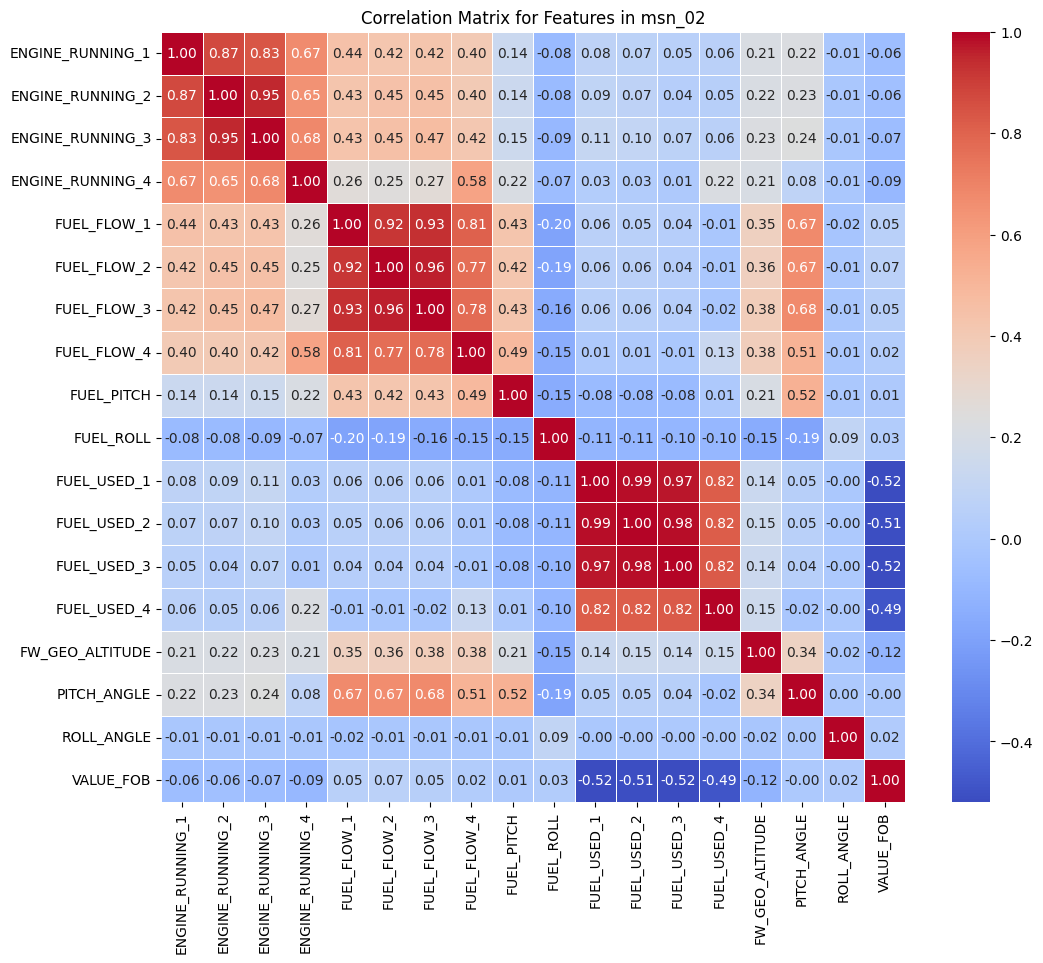

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_features_msn_02 = msn_02[['ENGINE_RUNNING_1', 'ENGINE_RUNNING_2', 'ENGINE_RUNNING_3', 'ENGINE_RUNNING_4',
                                      'FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4',
                                      'FUEL_PITCH', 'FUEL_ROLL',
                                      'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
                                      'FW_GEO_ALTITUDE', 'PITCH_ANGLE', 'ROLL_ANGLE',
                                      'VALUE_FOB']]
correlation_matrix_msn_02 = selected_features_msn_02.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_msn_02, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Features in msn_02')
plt.show()

Visualizing the correlation matrix for selected features in 'msn_02'

After some considerations and research based on Feature Correlations, and Model Metrics, "FUEL_FLOW_AVE" (Fuel Flow Average) feature is considered as the most relevant non-shared feature, to add to the final model for Feature Enhancing over "filtered2_msn_02".

## **2.2. filtered2_msn_02 EDA**

In [ ]:
filtered2_msn_02.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,PITCH_ANGLE,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF
0,2011-03-09 12:44:19,V0136,8.0,26046.0,10.071710,1847.500,908.3574,0.0,14048.0,0.0,0.0000
1,2011-03-09 12:44:20,V0136,8.0,26042.0,10.052480,1866.875,910.3853,1.0,14048.0,4.0,2.0279
2,2011-03-09 12:44:21,V0136,8.0,26038.0,9.931633,1886.375,912.5397,2.0,14048.0,4.0,2.1544
3,2011-03-09 12:44:22,V0136,8.0,26032.0,9.821770,1906.000,914.5687,3.0,14048.0,6.0,2.0290
4,2011-03-09 12:44:23,V0136,8.0,26029.0,9.725639,1925.750,916.7865,4.0,14048.0,3.0,2.2178


Displaying the first few rows of the DataFrame 'filtered2_msn_02'

In [ ]:
filtered2_msn_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378554 entries, 0 to 378553
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UTC_TIME                  378554 non-null  object 
 1   Flight                    378554 non-null  object 
 2   FLIGHT_PHASE_COUNT        378554 non-null  float64
 3   VALUE_FOB                 378554 non-null  float64
 4   PITCH_ANGLE               378554 non-null  float64
 5   FW_GEO_ALTITUDE           378554 non-null  float64
 6   TOTAL_FUEL_USED           378554 non-null  float64
 7   SECONDS_PER_FLIGHT        378554 non-null  float64
 8   TOTAL_SECONDS_PER_FLIGHT  378554 non-null  float64
 9   VALUE_FOB_DIFF            378554 non-null  float64
 10  TOTAL_FUEL_USED_DIFF      378554 non-null  float64
dtypes: float64(9), object(2)
memory usage: 31.8+ MB


Displaying concise information about the DataFrame 'filtered2_msn_02'

In [ ]:
null_values = filtered2_msn_02.isnull().sum()
print(null_values)

UTC_TIME                    0
Flight                      0
FLIGHT_PHASE_COUNT          0
VALUE_FOB                   0
PITCH_ANGLE                 0
FW_GEO_ALTITUDE             0
TOTAL_FUEL_USED             0
SECONDS_PER_FLIGHT          0
TOTAL_SECONDS_PER_FLIGHT    0
VALUE_FOB_DIFF              0
TOTAL_FUEL_USED_DIFF        0
dtype: int64


Calculating and printing the sum of null values for each column in 'filtered2_msn_02'

In [ ]:
df = filtered2_msn_02.copy()
df['UTC_TIME'] = pd.to_datetime(df['UTC_TIME'])
flight_durations = df.groupby('Flight')['UTC_TIME'].agg([min, max]).reset_index()
flight_durations['Duration'] = flight_durations['max'] - flight_durations['min']
flight_durations['Duration_Minutes'] = flight_durations['Duration'].dt.total_seconds() / 60
flight_durations_sorted = flight_durations.sort_values(by='Duration', ascending=False)
print(flight_durations_sorted[['Flight', 'Duration', 'Duration_Minutes']])

   Flight        Duration  Duration_Minutes
36  V0965 0 days 04:46:32        286.533333
7   V0135 0 days 04:41:42        281.700000
34  V0963 0 days 04:34:09        274.150000
37  V0966 0 days 04:28:26        268.433333
9   V0137 0 days 04:26:42        266.700000
32  V0929 0 days 04:22:06        262.100000
1   V0095 0 days 04:11:29        251.483333
2   V0097 0 days 04:03:10        243.166667
8   V0136 0 days 03:54:08        234.133333
25  V0837 0 days 03:53:57        233.950000
4   V0099 0 days 03:52:29        232.483333
19  V0625 0 days 03:25:39        205.650000
20  V0626 0 days 03:19:54        199.900000
13  V0345 0 days 03:17:27        197.450000
35  V0964 0 days 03:14:10        194.166667
5   V0133 0 days 03:11:47        191.783333
17  V0623 0 days 03:10:56        190.933333
3   V0098 0 days 03:09:33        189.550000
28  V0925 0 days 03:02:19        182.316667
33  V0962 0 days 02:57:57        177.950000
0   V0094 0 days 02:52:14        172.233333
11  V0140 0 days 02:42:11       

Calculating the duration of each flight in the filtered2_msn_02 DataFrame. Creating a new DataFrame flight_durations by grouping the data by 'Flight' and calculating the minimum and maximum UTC times. Then, it calculates the duration by subtracting the minimum from the maximum UTC time. The result is sorted in descending order based on the duration, and the selected columns ('Flight', 'Duration', 'Duration_Minutes') are printed for analysis.

In [ ]:
average_duration_hours = flight_durations['Duration_Minutes'].mean()
print(f"Average Flight Duration: {average_duration_hours} hours")

Average Flight Duration: 176.78859649122808 hours


Calculating and printing the average flight duration in hours

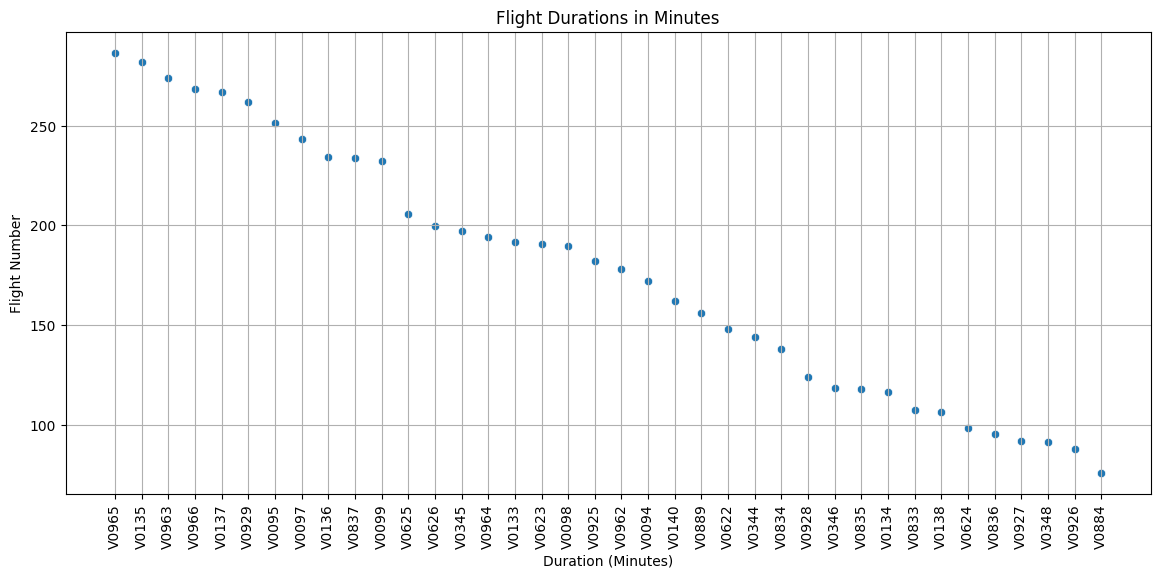

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Flight', y='Duration_Minutes', data=flight_durations_sorted, marker='o')
plt.title('Flight Durations in Minutes')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Flight Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Generating and displaying a scatter plot using Seaborn and Matplotlib. The plot visualizes flight durations for each flight in the flight_durations_sorted DataFrame. The x-axis represents the flight numbers, the y-axis represents the duration in minutes, and each point is marked with a circle ('o'). The plot provides a visual representation of the distribution of flight durations.

In [ ]:
phase_durations = df.groupby(['Flight', 'FLIGHT_PHASE_COUNT'])['UTC_TIME'].agg([min, max])
phase_durations['PHASE_DURATION'] = phase_durations['max'] - phase_durations['min']
phase_durations.reset_index(inplace=True)
phase_durations['DURATION_SECONDS'] = phase_durations['PHASE_DURATION'].dt.total_seconds()
average_phase_duration_seconds = phase_durations.groupby('FLIGHT_PHASE_COUNT')['DURATION_SECONDS'].mean()
print("Average duration of each flight phase (in seconds):")
print(average_phase_duration_seconds)

Average duration of each flight phase (in seconds):
FLIGHT_PHASE_COUNT
8.0    10607.315789
Name: DURATION_SECONDS, dtype: float64


This code calculates and prints the average duration of each flight phase in seconds. It groups the data by 'Flight' and 'FLIGHT_PHASE_COUNT', calculates the minimum and maximum UTC times for each group, and then calculates the duration for each phase. The results are converted to seconds, and the average duration for each flight phase is printed for analysis.

In [ ]:
df = df[df['FLIGHT_PHASE_COUNT'] == 8]
df['UTC_TIME'] = pd.to_datetime(df['UTC_TIME'])
flight_duration = df.groupby('Flight')['UTC_TIME'].agg([min, max])
flight_duration['Duration'] = flight_duration['max'] - flight_duration['min']
flight_duration['Duration'] = flight_duration['Duration'].dt.total_seconds() / 60
total_rows_per_flight = df.groupby('Flight').size()
rows_per_flight_and_phase = df.groupby(['Flight', 'FLIGHT_PHASE_COUNT']).size()
total_rows_per_flight_df = total_rows_per_flight.reset_index(name='Total Rows')
rows_per_flight_and_phase_df = rows_per_flight_and_phase.reset_index(name='Rows per Phase')
total_rows_and_duration_df = total_rows_per_flight_df.merge(
    flight_duration['Duration'], left_on='Flight', right_index=True
)
total_rows_and_duration_sorted = total_rows_and_duration_df.sort_values(by='Total Rows', ascending=False)
print("Total Rows and Duration per Flight (Sorted):")
print(total_rows_and_duration_sorted.head(100))

Total Rows and Duration per Flight (Sorted):
   Flight  Total Rows    Duration
36  V0965       17193  286.533333
7   V0135       16903  281.700000
34  V0963       16356  274.150000
37  V0966       16107  268.433333
9   V0137       16003  266.700000
32  V0929       15727  262.100000
1   V0095       15084  251.483333
2   V0097       14591  243.166667
8   V0136       14049  234.133333
25  V0837       14038  233.950000
4   V0099       13950  232.483333
19  V0625       12200  205.650000
35  V0964       11630  194.166667
5   V0133       11508  191.783333
17  V0623       11457  190.933333
3   V0098       11374  189.550000
28  V0925       10937  182.316667
33  V0962       10552  177.950000
0   V0094       10335  172.233333
11  V0140        9732  162.183333
27  V0889        9141  156.316667
16  V0622        8884  148.050000
12  V0344        8658  144.283333
22  V0834        8300  138.316667
31  V0928        7442  124.016667
23  V0835        7081  118.000000
6   V0134        6992  116.516667
13 

Filtering the data for flights with a 'FLIGHT_PHASE_COUNT' equal to 8 and calculating the total rows and duration for each flight. It then creates DataFrames for total rows per flight and rows per flight and phase. Finally, it merges these DataFrames, sorts the result by total rows in descending order, and prints the top 100 flights along with their total rows and duration for further analysis.

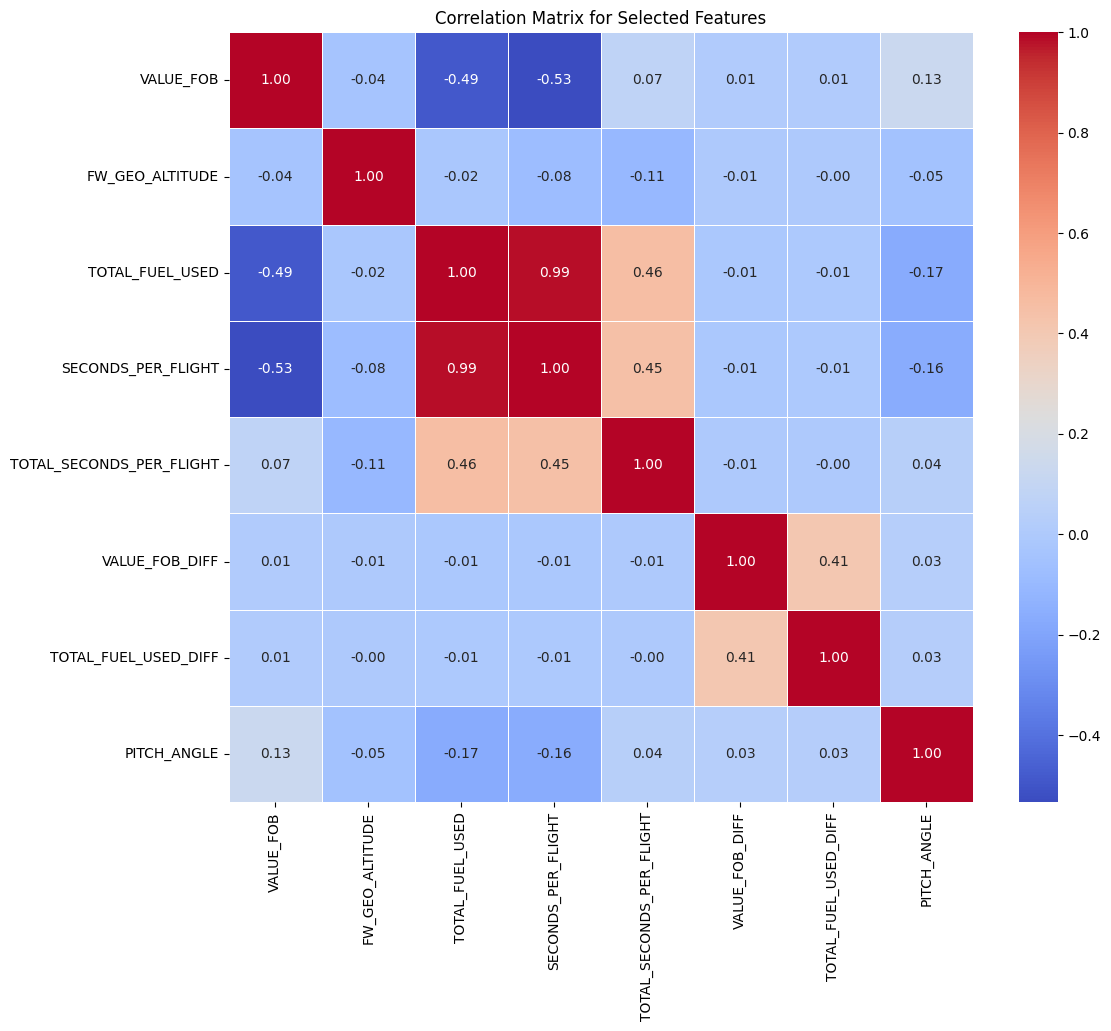

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = df[['VALUE_FOB', 'FW_GEO_ALTITUDE', 'TOTAL_FUEL_USED',
                        'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT',
                        'VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF', 'PITCH_ANGLE']]
correlation_matrix = selected_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Selected Features')
plt.show()

Plotting the correlation matrix with the specified final features selected

# **3. PITCH_ANGLE  Prediction Model**

## **3.1. Models for Predicting FUEL_FLOW_AVE**

In [5]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/filtered4_msn_02.csv'
filtered2_msn_02 = pd.read_csv(file_path)

Reading filtered2_msn_02.csv file into a Pandas DataFrame

### **3.1.1. Predictive Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
def calculate_mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))
feature_columns = ['VALUE_FOB', 'FW_GEO_ALTITUDE', 'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT', 'VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF']
target_column = 'PITCH_ANGLE'
X = filtered2_msn_02[feature_columns]
y = filtered2_msn_02[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mape = calculate_mape(y_test, predictions)
    print(f"{model.__class__.__name__} MSE: {mse:.2f}")
    print(f"{model.__class__.__name__} MAPE: {mape:.2f}%")
    print("\n")

LinearRegression MSE: 9.86
LinearRegression MAPE: inf%


Ridge MSE: 9.86
Ridge MAPE: inf%


Lasso MSE: 9.88
Lasso MAPE: inf%


RandomForestRegressor MSE: 0.20
RandomForestRegressor MAPE: inf%


GradientBoostingRegressor MSE: 5.22
GradientBoostingRegressor MAPE: inf%




This code performs regression analysis using different models (Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, and Gradient Boosting Regressor). It evaluates each model's performance by calculating Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) on a test set. The results are printed for analysis and comparison between the different regression models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.metrics import mean_squared_error
import numpy as np
def calculate_mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mape = calculate_mape(y_test, predictions)
print(f"RandomForestRegressor MSE: {mse:.2f}")
print(f"RandomForestRegressor MAPE: {mape:.2f}%")
drive_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/random_forest_model2.pkl'
joblib.dump(model_rf, drive_path, protocol=4)

This code trains a RandomForestRegressor model using the training set (X_train and y_train), makes predictions on the test set (X_test), and evaluates its performance using Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE). The trained model is then saved as a joblib file on Google Drive for future use or deployment.

## **3.2. msn37 FUEL_FLOW_AVE Prediction**

### **3.3.1. msn37 FILTERING**

In [6]:
filtered_msn_37 = msn_37.loc[:, ['UTC_TIME', 'Flight', 'FLIGHT_PHASE_COUNT',
                                  'VALUE_FOB', 'FUEL_USED_1',
                                  'FUEL_USED_2', 'FUEL_USED_3','FUEL_USED_4',
                                  'FW_GEO_ALTITUDE']]
filtered_msn_37 = filtered_msn_37[filtered_msn_37['FLIGHT_PHASE_COUNT'] == 8]
filtered_msn_37['UTC_TIME'] = pd.to_datetime(filtered_msn_37['UTC_TIME'])

filtered_msn_37['TOTAL_FUEL_USED'] = filtered_msn_37[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)
filtered_msn_37.drop(columns=['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4'], inplace=True)
filtered_msn_37.drop_duplicates(inplace=True)

filtered_msn_37['SECONDS_PER_FLIGHT'] = (filtered_msn_37['UTC_TIME'] - filtered_msn_37.groupby('Flight')['UTC_TIME'].transform('first')).dt.total_seconds()
filtered_msn_37 = filtered_msn_37[filtered_msn_37['VALUE_FOB'] != 0]

filtered_msn_37['TOTAL_SECONDS_PER_FLIGHT'] = filtered_msn_37.groupby('Flight')['UTC_TIME'].transform(lambda x: (x.max() - x.min()).total_seconds())

filtered_msn_37['VALUE_FOB_DIFF'] = filtered_msn_37.groupby('Flight')['VALUE_FOB'].diff(periods=1)
filtered_msn_37['VALUE_FOB_DIFF'] = np.multiply(filtered_msn_37['VALUE_FOB_DIFF'], -1)
filtered_msn_37['VALUE_FOB_DIFF'] = filtered_msn_37['VALUE_FOB_DIFF'].fillna(0)

filtered_msn_37['TOTAL_FUEL_USED_DIFF'] = filtered_msn_37.groupby('Flight')['TOTAL_FUEL_USED'].diff(periods=1)
filtered_msn_37['TOTAL_FUEL_USED_DIFF'].fillna(0, inplace=True)

filtered_msn_37 = filtered_msn_37[filtered_msn_37['TOTAL_SECONDS_PER_FLIGHT'] >= 3600]
filtered_msn_37.reset_index(drop=True, inplace=True)

filtered_msn_37 = filtered_msn_37[filtered_msn_37['TOTAL_SECONDS_PER_FLIGHT'] >= 1800]
filtered_msn_37.reset_index(drop=True, inplace=True)

In [7]:
filtered_msn_37.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF
0,2016-07-27 13:42:57,0.0,8.0,18508.0,1504.0,0.0,0.0,11640.0,0.0,0.0
1,2016-07-27 13:42:58,0.0,8.0,18498.0,1547.0,0.0,1.0,11640.0,10.0,0.0
2,2016-07-27 13:42:59,0.0,8.0,18488.0,1586.0,0.0,2.0,11640.0,10.0,0.0
3,2016-07-27 13:43:00,0.0,8.0,18481.0,1630.0,0.0,3.0,11640.0,7.0,0.0
4,2016-07-27 13:43:01,0.0,8.0,18472.0,1673.0,0.0,4.0,11640.0,9.0,0.0


In [8]:
filtered_msn_37.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424175 entries, 0 to 2424174
Data columns (total 10 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   UTC_TIME                  datetime64[ns]
 1   Flight                    float64       
 2   FLIGHT_PHASE_COUNT        float64       
 3   VALUE_FOB                 float64       
 4   FW_GEO_ALTITUDE           float64       
 5   TOTAL_FUEL_USED           float64       
 6   SECONDS_PER_FLIGHT        float64       
 7   TOTAL_SECONDS_PER_FLIGHT  float64       
 8   VALUE_FOB_DIFF            float64       
 9   TOTAL_FUEL_USED_DIFF      float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 184.9 MB


In [ ]:
unique_flights2 = filtered_msn_37['Flight'].nunique()
print(f"The number of unique flights in filtered2_msn_37 is: {unique_flights2}")

The number of unique flights in filtered2_msn_37 is: 217


In [ ]:
filtered_msn_37.shape

(2424175, 10)

### **1.3.2. Predictions of FUEL_FLOW_AVE on msn37**

In [ ]:
!pip install joblib

In [9]:
import pandas as pd
import joblib
drive_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/random_forest_model.pkl'
loaded_model_rf = joblib.load(drive_path)
features_for_training = ['VALUE_FOB', 'FW_GEO_ALTITUDE',
                          'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT',
                          'VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF']
features_for_msn_37 = ['VALUE_FOB', 'FW_GEO_ALTITUDE',
                        'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT',
                        'VALUE_FOB_DIFF', 'TOTAL_FUEL_USED_DIFF']
X_msn_37 = filtered_msn_37[features_for_msn_37]
predictions_msn_37 = loaded_model_rf.predict(X_msn_37)
predicted_msn_37 = filtered_msn_37.copy()
predicted_msn_37['FUEL_FLOW_AVE'] = predictions_msn_37

This code snippet loads the pre-trained RandomForestRegressor model from Google Drive and uses it to make predictions for a new dataset ('msn_37'). The relevant features for 'msn_37' are extracted, predictions are made using the loaded model, and the results are stored in a new DataFrame named predicted_msn_37. The 'FUEL_FLOW_AVE' column in this DataFrame contains the predicted values for the 'msn_37' dataset.

In [ ]:
predicted_msn_37.head()

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,VALUE_FOB_DIFF,TOTAL_FUEL_USED_DIFF,FUEL_FLOW_AVE
0,2016-07-27 13:42:57,0.0,8.0,18508.0,1504.0,0.0,0.0,11640.0,0.0,0.0,1577.655772
1,2016-07-27 13:42:58,0.0,8.0,18498.0,1547.0,0.0,1.0,11640.0,10.0,0.0,1577.655772
2,2016-07-27 13:42:59,0.0,8.0,18488.0,1586.0,0.0,2.0,11640.0,10.0,0.0,1809.398805
3,2016-07-27 13:43:00,0.0,8.0,18481.0,1630.0,0.0,3.0,11640.0,7.0,0.0,1818.945113
4,2016-07-27 13:43:01,0.0,8.0,18472.0,1673.0,0.0,4.0,11640.0,9.0,0.0,1817.403025


Displaying the first few rows of the DataFrame 'predicted_msn_37'

In [ ]:
predicted_msn_37.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424175 entries, 0 to 2424174
Data columns (total 11 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   UTC_TIME                  datetime64[ns]
 1   Flight                    float64       
 2   FLIGHT_PHASE_COUNT        float64       
 3   VALUE_FOB                 float64       
 4   FW_GEO_ALTITUDE           float64       
 5   TOTAL_FUEL_USED           float64       
 6   SECONDS_PER_FLIGHT        float64       
 7   TOTAL_SECONDS_PER_FLIGHT  float64       
 8   VALUE_FOB_DIFF            float64       
 9   TOTAL_FUEL_USED_DIFF      float64       
 10  FUEL_FLOW_AVE             float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 203.4 MB


Displaying concise information about the DataFrame 'predicted_msn_37'

In [10]:
predicted_msn_37.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/predicted2_msn_37.csv', index=False)

Save 'predicted_msn_37' DataFrame to a CSV file